In [5]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
competition = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [7]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('competition data shape :', competition.shape)

train data shape : (23524, 13)
competition data shape : (10086, 12)


In [8]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [9]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [25]:
competition.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [11]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

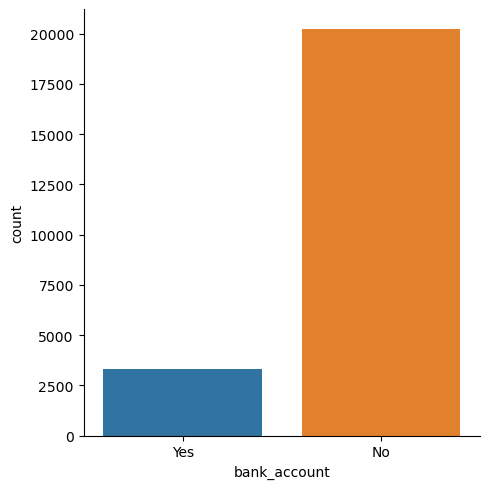

In [12]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train)

In [15]:

pd.set_option('display.max_colwidth', None)
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,"The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know"
9,marital_status,"The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know"


###### 3. Data preparation for machine learning

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'household_size'}>],
       [<Axes: title={'center': 'age_of_respondent'}>, <Axes: >]],
      dtype=object)

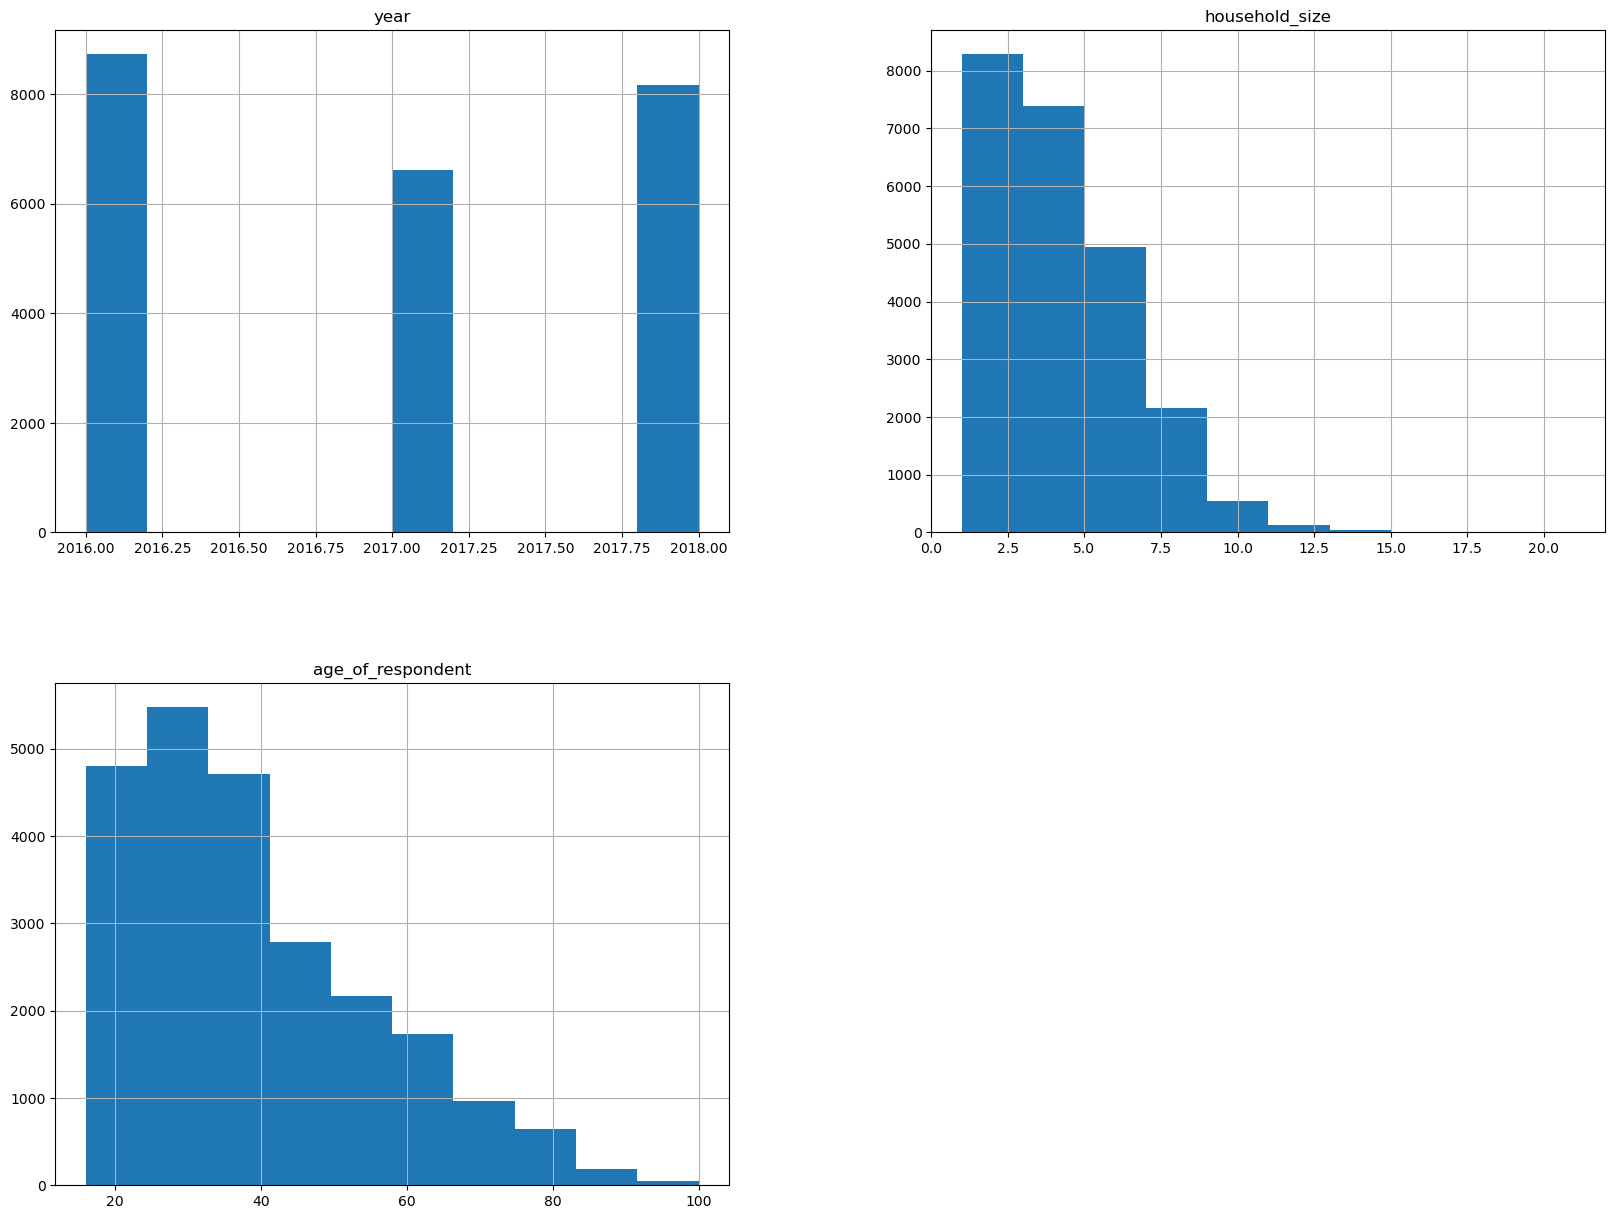

In [18]:
train.hist(figsize=(20,15))

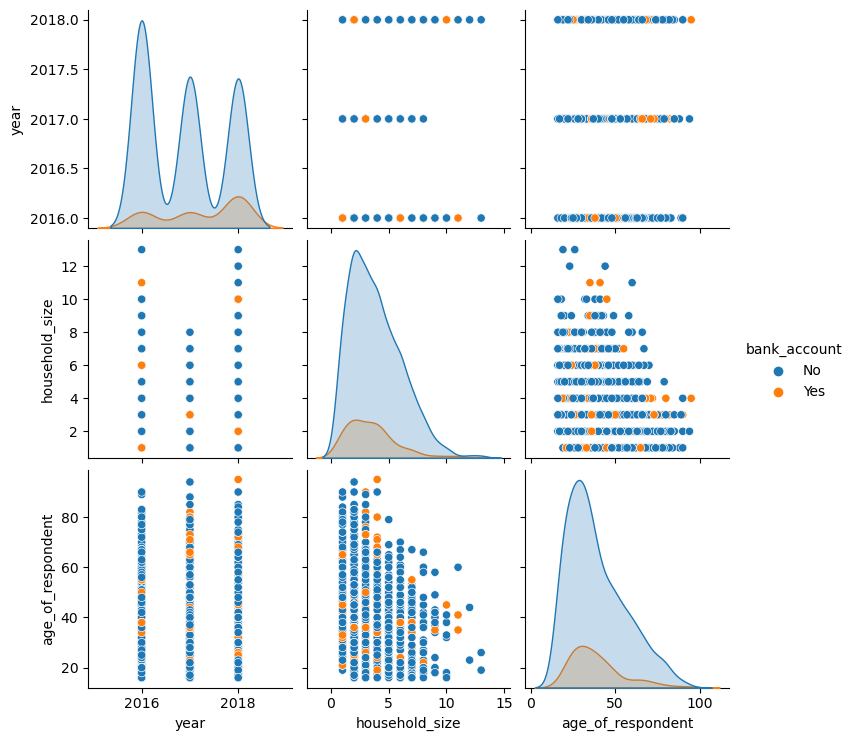

In [19]:
sns.pairplot(train.sample(1000, random_state=10086), hue="bank_account")

In [20]:
train['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [40]:
target =['bank_account']
col_predictors = ['country', 'year', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'] # drop uniqueid
categorical_vars=['country', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']
numerical_vars=[col for col in col_predictors if col not in categorical_vars]
print(numerical_vars)

['year', 'household_size', 'age_of_respondent']


In [41]:
# printing categorical variables
for item in categorical_vars:
    print(train[item].value_counts())
    print()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

Rural    14343
Urban     9181
Name: location_type, dtype: int64

Yes    17454
No      6070
Name: cellphone_access, dtype: int64

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [42]:
#split train data
X = train[col_predictors]
y = train[target]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=123, stratify=y) 
print(f"X_train.shape: {X_train.shape}")
print(f"X_val.shape: {X_val.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_val.shape: {y_val.shape}")

X_train.shape: (21171, 11)
X_val.shape: (2353, 11)
y_train.shape: (21171, 1)
y_val.shape: (2353, 1)


In [43]:
#Pre-processing Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

pipeline_categorical = Pipeline([('onehot',OneHotEncoder(handle_unknown='ignore')),])
pipeline_numerical =Pipeline([('scaler',MinMaxScaler(feature_range=(0,1))),])
pipeline_full = ColumnTransformer([('categorical',pipeline_categorical, categorical_vars),
                                   ('numerical',pipeline_numerical,numerical_vars)])

# apply pipeline for train data
X_train_transformed = pipeline_full.fit_transform(X_train)
X_val_transformed = pipeline_full.transform(X_val)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_val_transformed.shape: {X_val_transformed.shape}")

X_train_transformed.shape: (21171, 40)
X_val_transformed.shape: (2353, 40)


In [44]:
# apply pipeline for competition data
competition_transformed = pipeline_full.transform(competition)
print(f"competition_transformed.shape:{competition_transformed.shape}")

competition_transformed.shape:(10086, 40)


###### Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
y_train = np.ravel(y_train)
logit_reg = LogisticRegression(n_jobs =-1, random_state=123,max_iter=1000).fit(X_train_transformed, y_train)


###### KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
y_train = np.ravel(y_train)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_transformed, y_train)

KNeighborsClassifier()

###### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
y_train = np.ravel(y_train)

rdf_clf = RandomForestClassifier(random_state=123)
rdf_clf.fit(X_train_transformed, y_train)

RandomForestClassifier()

###### 4. Cross Validation

In [66]:
np.random.seed(123)
from sklearn.model_selection import cross_val_score

def cross_validation(model):
    # Perform cross-validation on transformed data
    cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5)

    # Print the mean and standard deviation of the cross-validation scores
    print(model)
    print("cross_val scores:",cv_scores)
    print("Mean accuracy:", cv_scores.mean())
    print("Standard deviation:", cv_scores.std())
    print()

models = [logit_reg, knn_clf, rdf_clf]
for model in models:
    cross_validation(model)


LogisticRegression(max_iter=1000, n_jobs=-1, random_state=123)
cross_val scores: [0.88358914 0.88379783 0.88639584 0.89159188 0.87978271]
Mean accuracy: 0.8850314790203999
Standard deviation: 0.0039000537120722025

KNeighborsClassifier()
cross_val scores: [0.87863046 0.87883798 0.8729334  0.88143599 0.8729334 ]
Mean accuracy: 0.8769542451364927
Standard deviation: 0.003428663722939384

RandomForestClassifier()
cross_val scores: [0.86658796 0.86065187 0.86490316 0.8615966  0.85829003]
Mean accuracy: 0.8624059240454655
Standard deviation: 0.0029798624554292683



###### Error Rate before hyperparameter tuning

In [92]:
# evaluate the model
models = [logit_reg, knn_clf, rdf_clf]
for model in models:
    model_pre = model.predict(X_val_transformed)

    # Get error rate
    print(model,"\nError rate:",1 - accuracy_score(y_val, model_pre))
    print()

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=123) 
Error rate: 0.12027199320017001

KNeighborsClassifier() 
Error rate: 0.12112197195070118

RandomForestClassifier() 
Error rate: 0.1334466638334042



###### Hyperparameter Tuning

In [73]:
# Logisitic regression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'lbfgs']}

logit_reg = LogisticRegression(solver = 'ibfgs', n_jobs=8)

# Use GridSearchCV to test all values for logistic regression model
grid_search = GridSearchCV(logit_reg, param_grid, cv=5)
grid_search.fit(X_train_transformed, np.ravel(y_train))

# Retrieve the best hyperparameter value and corresponding model
best_params = grid_search.best_params_
best_logit_reg = grid_search.best_estimator_


/Users/Ann/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/Ann/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/Ann/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/Ann/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/Ann/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 's

/Users/Ann/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Ann/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Ann/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/Ann/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver

In [74]:
# Print the best hyperparameters and model
print("Best hyperparameters:", best_params)
print("Best logistic regression model:", best_logit_reg)

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best logistic regression model: LogisticRegression(C=0.1, n_jobs=8, penalty='l1', solver='liblinear')


In [111]:
# KNN
# create a dictionary for all values we want to test for n_neighbors
param_grid ={'n_neighbors': [3, 5, 10, 20]}

# use Gridsearch to test all values for n_neighbors
knn_gscv =GridSearchCV(knn_clf, param_grid, cv=5)
knn_gscv.fit(X_train_transformed, y_train)

#Retrieve the best hyperparameter value and corresponding model
best_n_neighbors = knn_gscv.best_params_['n_neighbors']
best_knn = knn_gscv.best_estimator_
# Print the best hyperparameter value
print("Best n_neighbors:", best_knn)

Best n_neighbors: KNeighborsClassifier(n_neighbors=20)


In [109]:
#RandomForest
#Define the parameter grid for GridSearchCV
param_grid = {'n_estimators': [4, 5, 10, 20, 50]}

#use Gridsearch to test all values for rfc model
grid_search = GridSearchCV(rdf_clf, param_grid, cv=5)

grid_search.fit(X_train_transformed, np.ravel(y_train))

#Retrieve the best hyperparameter value and corresponding model
best_n_estimators = grid_search.best_params_['n_estimators']
best_rdf = grid_search.best_estimator_
print(best_rdf)
# Print the best hyperparameter value
print("Best n_estimators:", best_n_estimators)

RandomForestClassifier(n_estimators=50)
Best n_estimators: 50


###### Error Rate AFTER hyperparameter tuning

In [103]:
model_pre1 = best_logit_reg.predict(X_val_transformed)
print("Error rate of logistic regression after HT:",1 - accuracy_score(y_val, model_pre1))
  

Error rate of logistic regression after HT: 0.12027199320017001


In [113]:
model_pre2 = best_knn.predict(X_val_transformed)
print("Error rate of KNN after HT:",1 - accuracy_score(y_val, model_pre2))

Error rate of KNN after HT: 0.11772205694857629


In [119]:
model_pre3 = best_rdf.predict(X_val_transformed)
print("Error rate of random forest after HT:",1 - accuracy_score(y_val, model_pre3))


Error rate of random forest after HT: 0.13472163195920106


In [115]:
# Get the predicted result for the competition Data
competition.bank_account = best_knn.predict(competition_transformed)

# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": competition["uniqueid"] + " x " + competition["country"],
                           "bank_account": competition.bank_account})

/var/folders/3d/7xw_65w14t1gbybrnvnqbwxc0000gn/T/ipykernel_68031/2180082955.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  competition.bank_account = best_knn.predict(competition_transformed)


In [116]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
9788,uniqueid_2705 x Uganda,0
748,uniqueid_6817 x Kenya,0
2300,uniqueid_8369 x Kenya,0
6866,uniqueid_7141 x Tanzania,0
9150,uniqueid_9425 x Tanzania,0


In [118]:
# Create submission csv file csv file
submission.to_csv('first_submission.csv', index = False)